========================= Importing Packages =========================
========================= Imported  Packages =========================

============================ Loading Data ============================
11493376/11490434 [==============================] - 0s 0us/step
========================== Loading Complete ==========================

========================== Visualizing Data ==========================


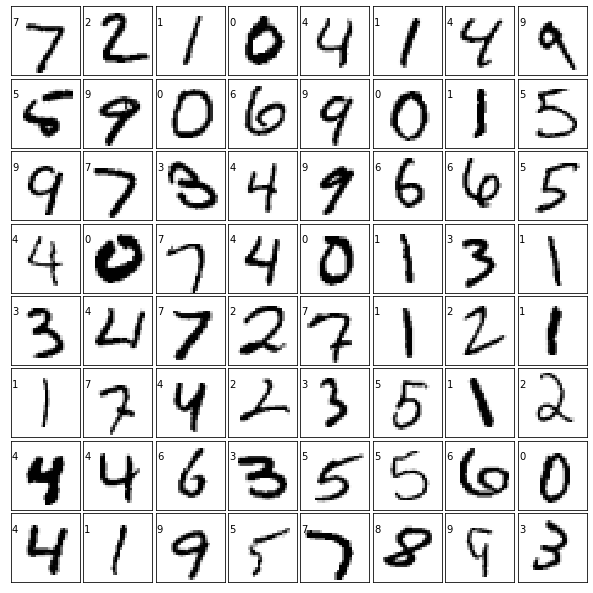


========================== Creating a model ==========================

============================ modelSummary ============================
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 28)                302876    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                290       
Total params: 303,806
Trainable params: 303,806
Non-trainable params: 0
______________________________________

In [ ]:
print("========================= Importing Packages =========================")
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image
from PIL import Image
import cv2

# Warning handler
import warnings
warnings.filterwarnings('ignore')
print("========================= Imported  Packages =========================")
print("")
# Loading Data
print("============================ Loading Data ============================")
handwriting_mnist = keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = keras.datasets.mnist.load_data()
train_images = train_images.reshape(len(train_images),28,28,1)
test_images = test_images.reshape(len(test_images),28,28,1)
print("========================== Loading Complete ==========================")
print("")
# Test Data Visualization
print("========================== Visualizing Data ==========================")
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(test_labels[i]))
plt.show()
print("")
# Creating model
print("========================== Creating a model ==========================")
model = keras.models.Sequential([
                                 keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                 keras.layers.MaxPool2D(2,2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(28,activation='relu'),
                                 keras.layers.Dense(10,activation='softmax')
])
print("")
print("============================ modelSummary ============================")
print(model.summary())
print("")
# Model Compile
print("========================== Compiling  model ==========================")
model.compile(optimizer='adam',metrics=['acc'],loss='sparse_categorical_crossentropy')
print("")
print("========================== Model's Compiled ==========================")
# Accuracy Callback
class handwriting_acc_callback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('acc')>=0.9):
       print("\n Model has reached 90% accuracy! Congratulations !!!!!")
       self.model.stop_training = False

handwriting_acc_callback = handwriting_acc_callback()
print("")
# Model Fitting
print("============================= Model- Fit =============================")
history = model.fit(train_images,train_labels,epochs=100,callbacks=[handwriting_acc_callback])
print("")
# Model Evaluation
print("========================== Model Evaluation ==========================")
model.evaluate(test_images,test_labels)
print("")
print("======================================================================")
print("======================================================================")
print("======= Congratulations model was succesful with >90% accuracy =======")
print("======================================================================")
print("======================================================================")
print("")
print("================= Now goahead and run the next cell! =================")

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


In [ ]:

import matplotlib.pyplot as plt
def display_training_loss_and_accuracy(history):
  
  plt.figure(figsize=(20,4))
  
  # summarize history for accuracy
  plt.subplot(1, 2, 1)
  plt.plot(history.history['acc'])
  #plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  
  # summarize history for loss
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  #plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.show()  


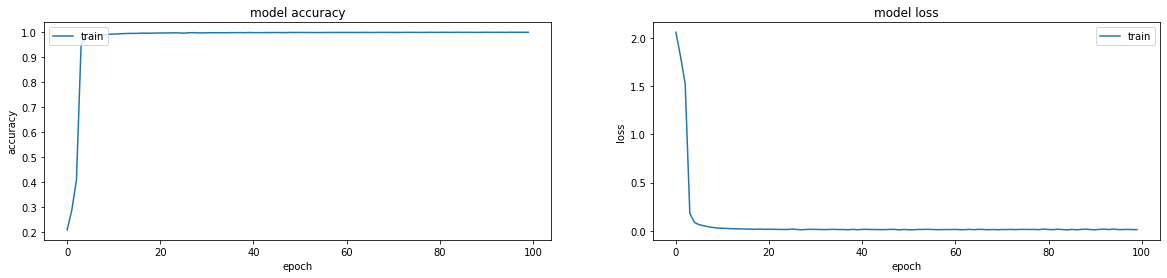

In [ ]:
display_training_loss_and_accuracy(history)

Data Source: https://keras.io/datasets/#mnist-database-of-handwritten-digits

In [ ]:
# Model Prediction
print("========================== Model Prediction ==========================")
uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path)
  x = image.img_to_array(img)
  x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
  print("**************** Uploaded Image ****************")
  plt.imshow(x,cmap='gray')
  plt.show()
  x = cv2.resize(np.array(x), (28, 28))
  x = x.reshape(28,28,1)
  x = np.expand_dims(x, axis=0)

  class_label = model.predict(x)
  print("Predicted Value is:",np.where(class_label[0]==max(class_label[0]))[0])

========================== Model Prediction ==========================


NameError: ignored